##**2. Image Classification**##

* In this Project, we will be classifying images of flowers using a tf.keras.Sequential model and load data using tf.keras.utils.image_dataset_from_directory

* Here we will be performing the following operations:

     1. Efficiently loading a dataset off disk

     2. Identifying overfitting and applying techniques to mitigate it, including data augmentation and dropout.

* Also, we will be doing how to convert a saved model to a TensorFlow Lite model for on-device machine learning on mobile, embedded, and IoT devices.



**Steps to be followed in this project:**


* **Step-1 : Importing Necessary Libraries**


* **Step-2: Downloading and Exploring the Dataset**


* **Step-2: Loading data using a Keras utility**


* **Step-4: Visualize the data**


* **Step-5: Configuring the dataset for performance**


* **Step-6: Standardize the data**



 **Step-7: Basic Keras model**


  * **Step-7.1: Creating the model**
       
  * **Step-7.2: Creating the model**

  * **Step-7.3: Training the model**



* **Step-8: Visualizing the trained result**

* **Step-9: Overfitting**

* **Step-10: Compiling and Training the model**

* **Step-11: Visualize the Training results**

* **Step-12: Predicting on new data**

* **Step-13: Using TensorFlow Lite**

**Inputs**:
* A dataset of about **3,700 photos of flowers**
* Totally **3670 images**

**Outputs**:
* Predictions generated by the original model **(99.58 percent confidence)**
* Predictions generated by the TensorFlow lite model **(99.58 percent confidence) 4.4107437e-06**

##**Source Code**##

**Step-1 : Importing Necessary Libraries**

* Importing the Tensorflow and the other necessary libraries




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


**Step-2: Downloading and Exploring the Dataset**

In this problem, the dataset contains 3700 photos of flowers and the dataset contains five subdirectories, one per class

     flower_photo/
  
     daisy/
  
     dandelion/
  
     roses/

     sunflowers/

     tulips/



In [ ]:
# Download and exploring the dataset

import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

#Here we are making a copy of the dataset available and printing the image count

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

#Finally, the image count is printed as 3670

3670


* The Image count is printed above

* Here, we are Checking the images of roses from the dataset and visualizing

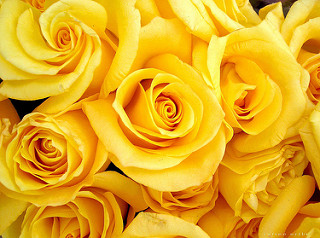

In [ ]:
#Checking the images of roses from the dataset and visualizing
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

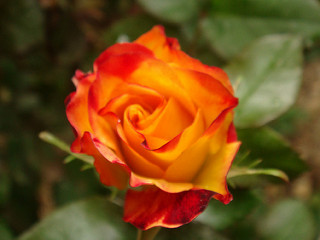

In [ ]:
PIL.Image.open(str(roses[1]))

* Here, we are Checking the images of tulips from the dataset and visualizing

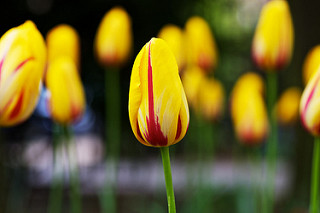

In [ ]:
#Checking the images of tulips from the dataset and visualizing
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

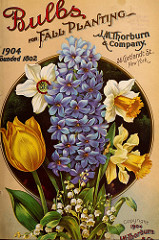

In [ ]:
PIL.Image.open(str(tulips[1]))

* Here, we are Checking the images of daisy from the dataset and visualizing

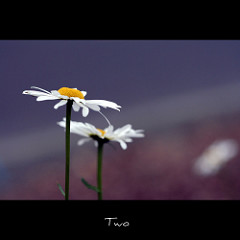

In [ ]:
#Checking the images of daisy from the dataset and visualizing
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

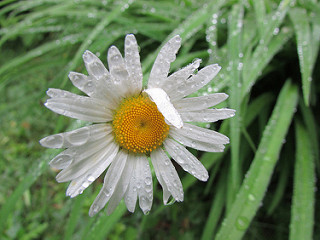

In [ ]:
PIL.Image.open(str(daisy[1]))

* Here, we are Checking the images of sunflowers from the dataset and visualizing

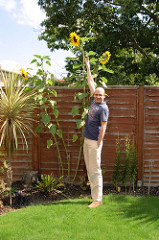

In [ ]:
#Checking the images of sunflowers from the dataset and visualizing
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[0]))

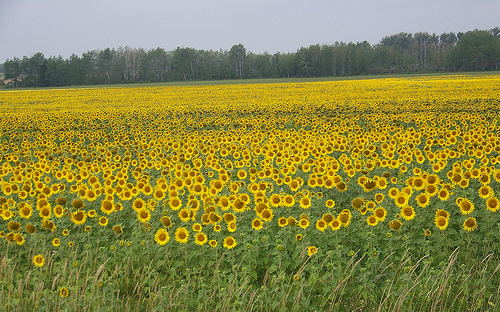

In [ ]:
PIL.Image.open(str(sunflowers[1]))

* Here, we are Checking the images of dandelion from the dataset and visualizing

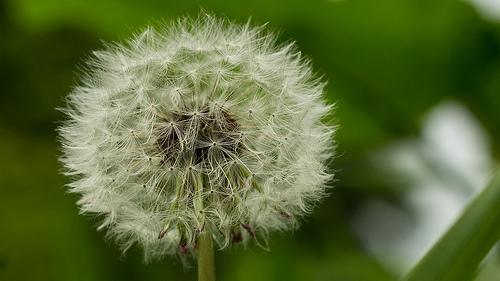

In [ ]:
#Checking the images of dandelion from the dataset and visualizing
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[0]))

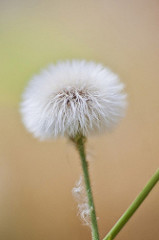

In [ ]:
PIL.Image.open(str(dandelion[1]))

**Step-2: Loading data using a Keras utility**

* Load these images off disk using the helpful "tf.keras.utils.image_dataset_from_directory" utility.

* This will take us from a directory of images on disk to a tf.data.Dataset in just a couple lines of code.

* Then, we are defining the parameters of the loader

In [ ]:
#Loading data using a Keras utility

#Load these images off disk using the helpful "tf.keras.utils.image_dataset_from_directory" utility. This will take you from a directory of images on disk to a tf.data.Dataset in just a couple lines of code.

#Defining the parameters for the loader

batch_size = 32
img_height = 180
img_width = 180

* Here we are splitting given datasets of images for training and validation splits

* 80% of the images we are taking it for training process

In [ ]:
#Here we are splitting given datasets of images for training and validation splits

#80% of the images we are taking it for training process

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# we found 2936 files for training

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


* 20% of the images we are taking it for validation process

In [ ]:
#20% of the images we are taking it for validation process

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# we found 734 files for validation

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


* we can find the class names in the class_names attribute on these datasets.
* These correspond to the directory names in alphabetical order.

In [ ]:
# we can find the class names in the class_names attribute on these datasets. These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Step-4: Visualize the data**

* In this step, we are getting the first nine images from the training dataset


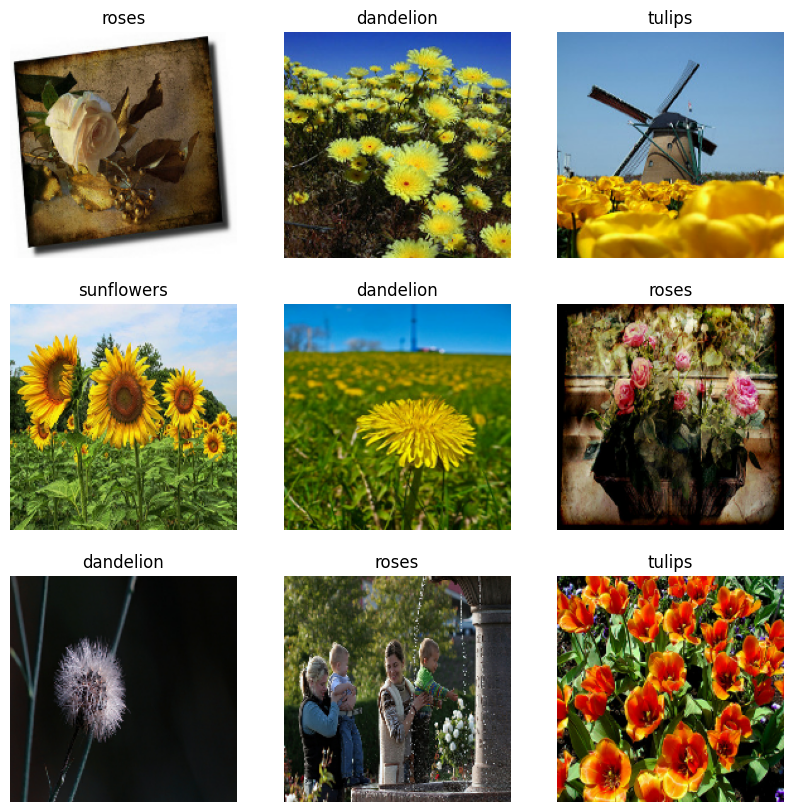

In [ ]:
# Visualize the data

#In this step, we are getting the first nine images from the training dataset

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

* The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB).
* The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
* we can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

In [ ]:
#The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

#we can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


**Step-5: Configuring the dataset for performance**


* Make sure we use buffered prefetching, so we can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

* Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If our dataset is too large to fit into memory, we can also use this method to create a performant on-disk cache.

* Dataset.prefetch overlaps data preprocessing and model execution while training.


In [ ]:
#Configure the dataset for performance

#Make sure to use buffered prefetching, so we can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

#Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If our dataset is too large to fit into memory, we can also use this method to create a performant on-disk cache.

#Dataset.prefetch overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Step-6: Standardize the data**

* Here, the RGB channel values are in the [0,255] range, which is not ideal for a neural network

* Generally, we have to make our input values small

* here, we will standardize values to be in the [0,1]rage by using "tf.keras.layers.Rescaling"

* There are two ways to use this layer:

1. We can apply it to the dataset by calling Dataset.map

2. We can include the layer inside our model definition, which can simplify deployment. Using the second approach here




In [ ]:
#Standardize the data

#Here, the RGB channel values are in the [0,255] range, which is not ideal for a neural network

#Generally, we have to make our input values small

#here, we will standardize values to be in the [0,1]rage by using "tf.keras.layers.Rescaling"

#There are two ways to use this layer:

#1. We can apply it to the dataset by calling Dataset.map

#2. We can include the layer inside our model definition, which can simplify deployment. Using the second approach here

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixel values are now in `[0,1]`.

print(np.min(first_image), np.max(first_image))

0.0 0.99954253


#**Step-7: Basic Keras model**#


**Step-7.1: Creating the model**

* The Keras Sequential model consists :

            1. Three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them.

            2. A fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').

In [ ]:
#A basic Keras model

#Create the model

#The Keras Sequential model consists :

            #1. Three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them.

            #2. A fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


**Step-7.2: Compiling the model**

* Choosing the "tf.keras.optimizers.Adam optimizer" and "tf.keras.losses.SparseCategoricalCrossentropy loss function"

* To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile

In [ ]:
#Complile the model

# Choosing the "tf.keras.optimizers.Adam optimizer" and "tf.keras.losses.SparseCategoricalCrossentropy loss function"

# To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Summary**

* Here, we will view all the layers of the network using the Keras "Model.summary method"

In [ ]:
# Model summary

# Here, we will view all the layers of the network using the Keras "Model.summary method"

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

**Step-7.3: Training the model**

* Now, train the model for 10 epochs with the Keras "Model.fit" method



In [ ]:
#Train the model

#Now, train the model for 10 epochs with the Keras "Model.fit" method

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 113s 1s/step - loss: 1.2300 - accuracy: 0.4741 - val_loss: 1.0531 - val_accuracy: 0.5954
Epoch 2/10
92/92 [==============================] - 97s 1s/step - loss: 0.9503 - accuracy: 0.6247 - val_loss: 1.0592 - val_accuracy: 0.5654
Epoch 3/10
92/92 [==============================] - 112s 1s/step - loss: 0.8002 - accuracy: 0.6870 - val_loss: 0.9407 - val_accuracy: 0.6431
Epoch 4/10
92/92 [==============================] - 120s 1s/step - loss: 0.6007 - accuracy: 0.7728 - val_loss: 0.9366 - val_accuracy: 0.6676
Epoch 5/10
92/92 [==============================] - 126s 1s/step - loss: 0.3613 - accuracy: 0.8706 - val_loss: 1.1159 - val_accuracy: 0.6376
Epoch 6/10
92/92 [==============================] - 105s 1s/step - loss: 0.2308 - accuracy: 0.9275 - val_loss: 1.4971 - val_accuracy: 0.6117
Epoch 7/10
92/92 [==============================] - 117s 1s/step - loss: 0.1186 - accuracy: 0.9653 - val_loss: 1.3550 - val_accuracy: 0.6417
Epoch 8/10
92/

**Step-8: Visualizing the trained result**

* Now, the plots of the loss and accuracy on the training and validation sets are created

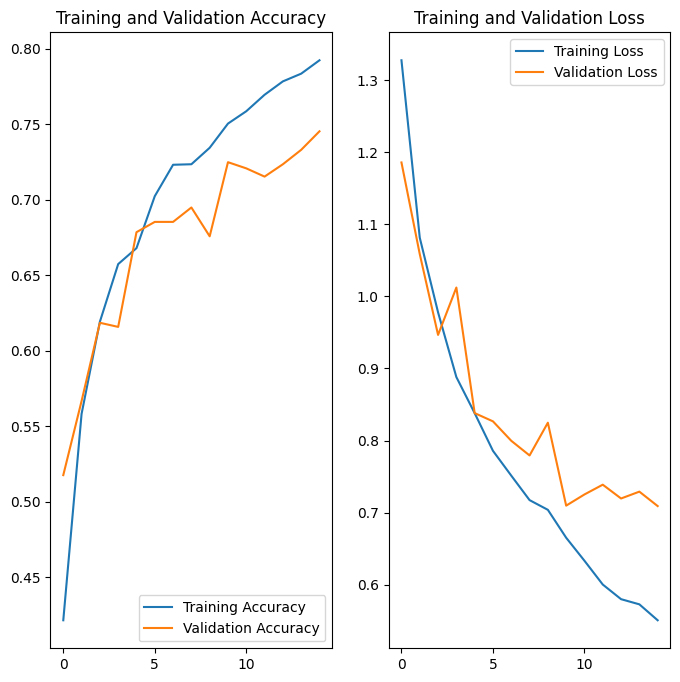

In [ ]:
#Visualize training results

#Now, the plots of the loss and accuracy on the training and validation sets are created

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Inference from the plots:

# From the plots, it is observed that training and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set. So, there is a  problem of overfitting in the model


* Inference from the plots:

* From the plots, it is observed that training and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set. So, there is a  problem of overfitting in the model

**Step-9: Overfitting**

* When you see the plot, the training accuracy is linearly increasing over time, whereas the validation accuracy stalls around 60% in the training process

* Obviously, the difference between training and validation accurcay is the sign of o0verfitting

* Overfitting: When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

* There are may ways in overcoming the overfitting process:

 1. Data Augmentation

 2. Drop out


**1. Data Augmentation :**

* Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

* We will implement data augmentation using the following Keras preprocessing layers: "tf.keras.layers.RandomFlip", "tf.keras.layers.RandomRotation", and "tf.keras.layers.RandomZoom". These can be included inside your model like other layers, and run on the GPU.

In [ ]:
#Overfitting

#1. Data Augmentation :

#Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

#We will implement data augmentation using the following Keras preprocessing layers: "tf.keras.layers.RandomFlip", "tf.keras.layers.RandomRotation", and "tf.keras.layers.RandomZoom". These can be included inside your model like other layers, and run on the GPU.

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

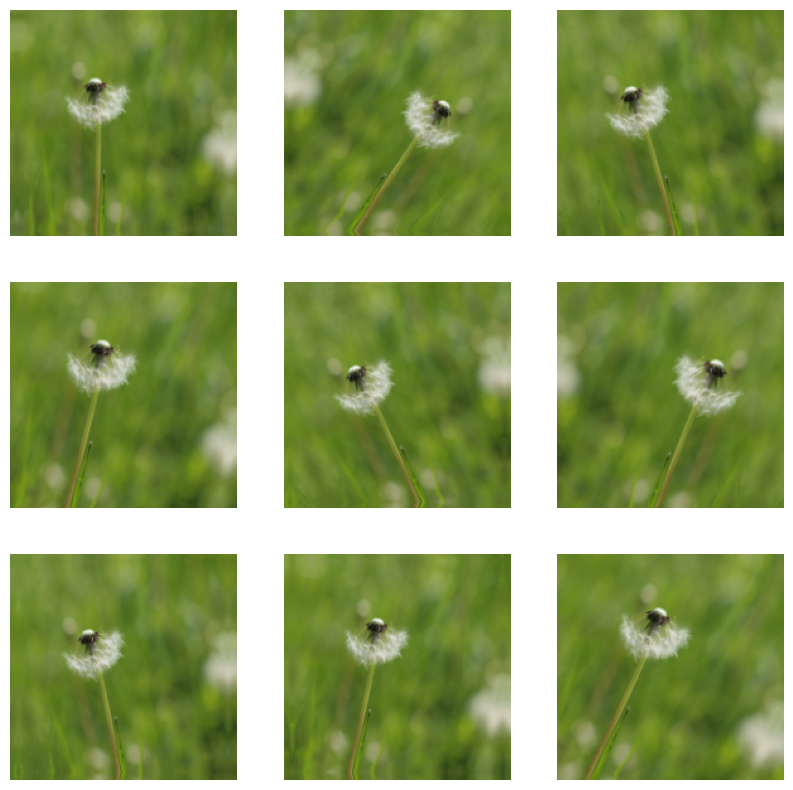

In [ ]:
#Now, we can Visualize a few augmented examples by applying data augmentation to the same image several times

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**2.Dropout**

* Another technique to reduce overfitting is to introduce dropout{:.external} regularization to the network.

* When we apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process.

* Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

* Create a new neural network with tf.keras.layers.Dropout before training it using the augmented images

In [ ]:
#Dropout

#Another technique to reduce overfitting is to introduce dropout{:.external} regularization to the network.

#When we apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process.

#Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

#Create a new neural network with tf.keras.layers.Dropout before training it using the augmented images

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

**Step-10 : Compiling and Training the model**

In [ ]:
#Compile and train the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 114s 1s/step - loss: 1.3277 - accuracy: 0.4217 - val_loss: 1.1859 - val_accuracy: 0.5177
Epoch 2/15
92/92 [==============================] - 132s 1s/step - loss: 1.0814 - accuracy: 0.5582 - val_loss: 1.0586 - val_accuracy: 0.5668
Epoch 3/15
92/92 [==============================] - 125s 1s/step - loss: 0.9778 - accuracy: 0.6192 - val_loss: 0.9465 - val_accuracy: 0.6185
Epoch 4/15
92/92 [==============================] - 136s 1s/step - loss: 0.8880 - accuracy: 0.6574 - val_loss: 1.0123 - val_accuracy: 0.6158
Epoch 5/15
92/92 [==============================] - 138s 2s/step - loss: 0.8379 - accuracy: 0.6679 - val_loss: 0.8380 - val_accuracy: 0.6785
Epoch 6/15
92/92 [==============================] - 145s 2s/step - loss: 0.7857 - accuracy: 0.7023 - val_loss: 0.8266 - val_accuracy: 0.6853
Epoch 7/15
92/92 [==============================] - 130s 1s/step - loss: 0.7513 - accuracy: 0.7231 - val_loss: 0.7996 - val_accuracy: 0.6853
Epoch 8/15
92

**Step-11: Visualize the Training results**



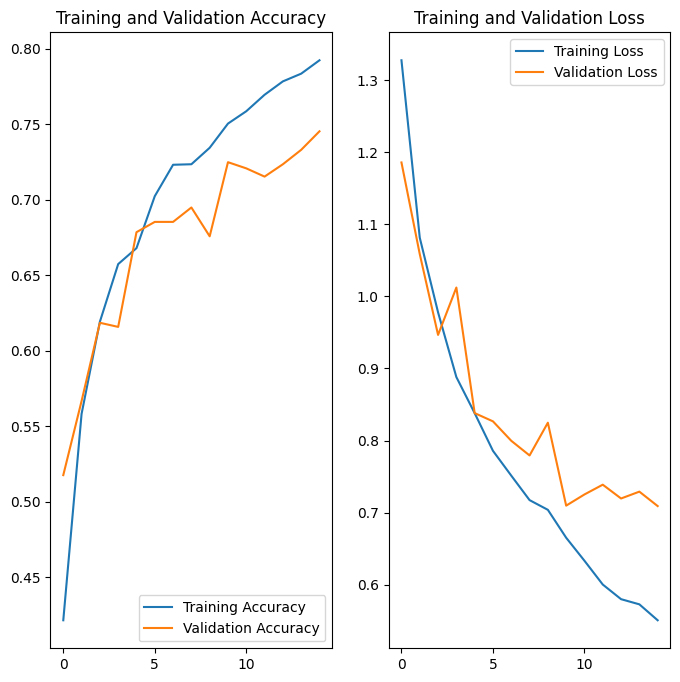

In [ ]:
#Visualize training results


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Inference after applying and drop out:

#It is found that there is less overfitting than before, and training and validation accuracy are closer aligned

**Inference after applying data augmentation and drop out**

* It is found that there is less overfitting than before, and training and validation accuracy are closer aligned

**Step-12: Predicting on new data**


* Then, use our model to classify an image that wasn't included in the training or validation sets.

In [ ]:
#Predict on new data

#Then, use our model to classify an image that wasn't included in the training or validation sets.

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 135ms/step
This image most likely belongs to sunflowers with a 99.58 percent confidence.


**Step-13: Using TensorFlow Lite**

* TensorFlow Lite is a set of tools that enables on-device machine learning by helping developers run their models on mobile, embedded, and edge devices.


* Convert the Keras Sequential model to a TensorFlow Lite model

* Inorder to use the trained model with on-device applications, first we have to convert it to a smaller and more efficient model format called a TensorFlow Lite model.

In [ ]:
#TensorFlow Lite

#TensorFlow Lite is a set of tools that enables on-device machine learning by helping developers run their models on mobile, embedded, and edge devices.

#Convert the Keras Sequential model to a TensorFlow Lite model

#Inorder to use the trained model with on-device applications, first we have to convert it to a smaller and more efficient model format called a TensorFlow Lite model.

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


#The TensorFlow Lite model we saved in the previous step can contain several function signatures. The Keras model converter API uses the default signature automatically

* Run the TensorFlow Lite model

In [ ]:
#Run the TensorFlow Lite model

#We can access the TensorFlow Lite saved model signatures in Python via the tf.lite.Interpreter class.

#Load the model with the Interpreter:

TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [ ]:
#Print the signatures from the converted model to obtain the names of the inputs (and outputs):

interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_3_input'], 'outputs': ['outputs']}}

In [ ]:
#In this example, we have one default signature called serving_default. In addition, the name of the 'inputs' is 'sequential_1_input', while the 'outputs' are called 'outputs'. You can look up these first and last Keras layer names when running Model.summary.

#Now we can test the loaded TensorFlow Model by performing inference on a sample image with tf.lite.Interpreter.get_signature_runner by passing the signature name as follows:

classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [ ]:
#We can use the TensorFlow Lite model to classify images that weren't included in the training or validation sets.

#We have already tensorized that image and saved it as img_array. Now, we pass it to the first argument (the name of the 'inputs') of the loaded TensorFlow Lite model (predictions_lite), compute softmax activations, and then print the prediction for the class with the highest computed probability.

predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [ ]:
#Finally, The prediction generated by the lite model should be almost identical to the predictions generated by the original model

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to sunflowers with a 99.58 percent confidence.


In [ ]:
print(np.max(np.abs(predictions - predictions_lite)))

#In the five classes—'daisy', 'dandelion', 'roses', 'sunflowers', and 'tulips'—the model we built should predict the image belongs to sunflowers, which is the same result as before the TensorFlow Lite conversion we obtained.

4.4107437e-06


* In the five classes—'daisy', 'dandelion', 'roses', 'sunflowers', and 'tulips'—the model we built should predict the image belongs to sunflowers, which is the same result as before the TensorFlow Lite conversion we obtained.